<a href="https://colab.research.google.com/github/makxxic/NOTEBOOKS/blob/main/Single_Variable_Linear_Regression_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def make_sample_data(n=20, seed=42, slope=3.5, intercept=2.0, noise_std=2.0):
    """
    Create a small synthetic dataset y = slope * x + intercept + noise
    Returns x (shape (n,)), y (shape (n,))
    """
    rng = np.random.default_rng(seed)
    x = np.linspace(0, 10, n)
    noise = rng.normal(loc=0.0, scale=noise_std, size=n)
    y = slope * x + intercept + noise
    return x, y

In [ ]:
X, Y = make_sample_data()
print(X)
print(Y)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.60943416  1.76213705  7.18511292  9.40744522  5.46635068  8.6061673
 13.30831239 14.26225166 16.70323979 16.87285951 22.17984858 23.81874177
 24.23732455 28.20185083 28.72449237 27.91299402 32.21118578 31.39802427
 36.91479534 36.90014818]


In [ ]:
def pred(X, m, c):
  return m * X + c

In [ ]:
def compute_mse(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

In [ ]:
compute_mse(X, Y)

np.float64(273.22974414597155)

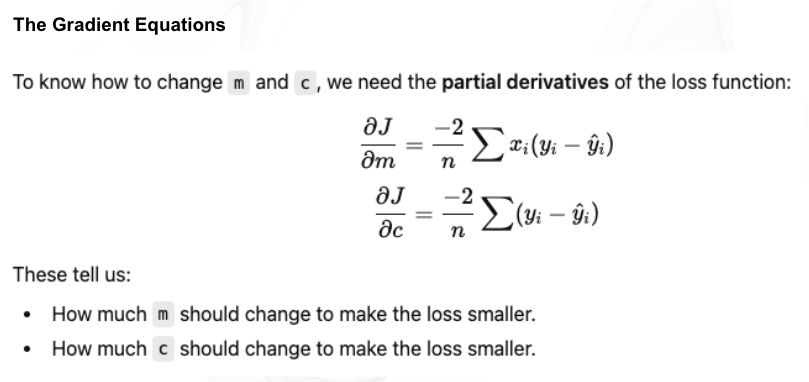

In [ ]:
def gradients(x, y, m, c):
    """
    Compute gradients of the MSE loss w.r.t m and c for the model y_hat = m*x + c
    dJ/dm = (-2/n) * sum( x_i * (y_i - y_hat_i) )
    dJ/dc = (-2/n) * sum( (y_i - y_hat_i) )
    """
    n = x.shape[0]
    y_hat = m * x + c
    error = y - y_hat
    dm = (-2.0 / n) * np.sum(x * error)
    dc = (-2.0 / n) * np.sum(error)
    return dm, dc

In [ ]:
X.shape, Y.shape

((20,), (20,))

In [ ]:
m = 2
c = 1
Y_hat = m * X + c
Y_hat

array([ 1.        ,  2.05263158,  3.10526316,  4.15789474,  5.21052632,
        6.26315789,  7.31578947,  8.36842105,  9.42105263, 10.47368421,
       11.52631579, 12.57894737, 13.63157895, 14.68421053, 15.73684211,
       16.78947368, 17.84210526, 18.89473684, 19.94736842, 21.        ])

In [ ]:
np.sum((Y - Y_hat)**2)

np.float64(1948.021925544639)

In [ ]:
gradients(X, Y, 2, 1)

(np.float64(-113.74984991620907), np.float64(-16.868271636741127))

### Steps in training with gradient descent
1. Calculate predicted values
2. Calculate the error
3. Calculate the gradients
4. Adjust parameters based on gradient and learning rate

In [ ]:
LR = 0.01
m = 0
c = 0

ms = []
cs = []
errors = []

In [ ]:
for _ in range(100):
    Y_hat = pred(X, m, c)
    error = compute_mse(Y, Y_hat)
    grad = gradients(X, Y, m, c)

    ms.append(m)
    cs.append(c)
    errors.append(error)

    # Adjust the parameters
    m = m - LR * grad[0]
    c = c - LR * grad[1]


    print(f"Updated parameters: m = {m}, c = {c}")

Updated parameters: m = 2.6059195517936695, c = 0.3886827163674113
Updated parameters: m = 3.3899732438812453, c = 0.5089998232281074
Updated parameters: m = 3.6255374359596733, c = 0.548505218742832
Updated parameters: m = 3.6959755886434937, c = 0.5636640871394193
Updated parameters: m = 3.7167033289671467, c = 0.5714759628996928
Updated parameters: m = 3.722467743598589, c = 0.5770588271123955
Updated parameters: m = 3.723729798639879, c = 0.5819535925777
Updated parameters: m = 3.723638865790598, c = 0.5866242572295693
Updated parameters: m = 3.723143083688796, c = 0.5912106018733294
Updated parameters: m = 3.7225278864554303, c = 0.5957547978343944
Updated parameters: m = 3.721879194048787, c = 0.6002696295995747
Updated parameters: m = 3.7212228606385924, c = 0.6047590339701159
Updated parameters: m = 3.7205666570193716, c = 0.6092242835942656
Updated parameters: m = 3.719912909861413, c = 0.6136658485878544
Updated parameters: m = 3.7192623068911197, c = 0.6180839569973673
Updat

X: [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]

Y: [ 2.60943416  1.76213705  7.18511292  9.40744522  5.46635068  8.6061673
 13.30831239 14.26225166 16.70323979 16.87285951 22.17984858 23.81874177
 24.23732455 28.20185083 28.72449237 27.91299402 32.21118578 31.39802427
 36.91479534 36.90014818]

Ŷ: [ 0.91698286  2.85131863  4.78565441  6.71999019  8.65432597 10.58866174
 12.52299752 14.4573333  16.39166908 18.32600486 20.26034063 22.19467641
 24.12901219 26.06334797 27.99768375 29.93201952 31.8663553  33.80069108
 35.73502686 37.66936263]

Error: 2.8687239266909734
Gradient: (np.float64(0.04152449460865668), np.float64(-0.2819261469694451))



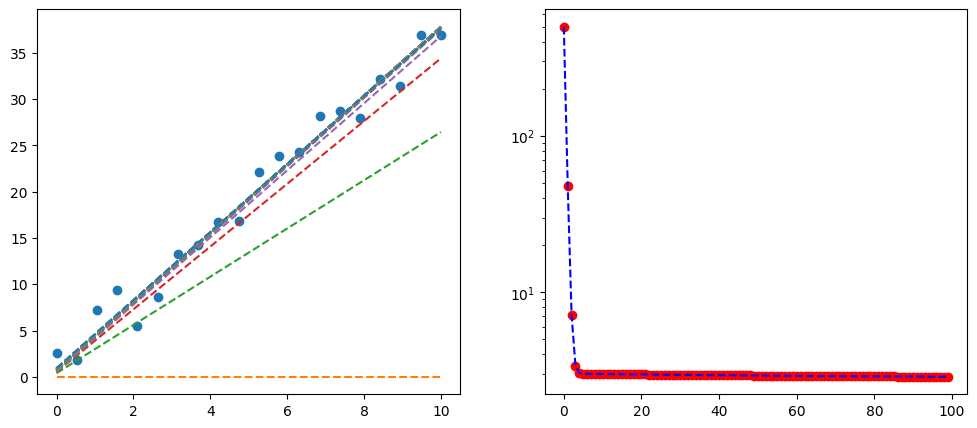

In [ ]:
print(f"X: {X}\n")
print(f"Y: {Y}\n")
print(f"Ŷ: {Y_hat}\n")
print(f"Error: {error}\nGradient: {grad}\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(X, Y, 'o')
for mi, ci in zip(ms, cs):
  plt.plot(X, pred(X, mi, ci), '--')

plt.subplot(1,2,2)
# Use logarithmic y-axis
plt.yscale('log')
plt.plot(errors, 'ro')
plt.plot(errors, 'b--')

plt.show()

## Linear Regression with Gradient Descent

Sample dataset (first 8 rows):
x=0.000, y=2.251
x=0.526, y=3.578
x=1.053, y=6.965
x=1.579, y=7.736
x=2.105, y=8.297
x=2.632, y=11.934
x=3.158, y=15.661
x=3.684, y=16.789
Epoch     1 | mse = 46.234900 | m = 2.538680 | c = 0.382673
Epoch   200 | mse = 2.879496 | m = 3.477768 | c = 1.595930
Epoch   400 | mse = 2.803953 | m = 3.423481 | c = 1.964508
Epoch   600 | mse = 2.794831 | m = 3.404616 | c = 2.092585
Epoch   800 | mse = 2.793730 | m = 3.398061 | c = 2.137091
Epoch  1000 | mse = 2.793597 | m = 3.395783 | c = 2.152556
Epoch  1200 | mse = 2.793581 | m = 3.394992 | c = 2.157930
Epoch  1400 | mse = 2.793579 | m = 3.394717 | c = 2.159798
Converged at epoch 1499 with mse change < 1e-09

Final model parameters:
  Slope (m)     = 3.394657
  Intercept (c) = 2.160203
  Final MSE     = 2.793579


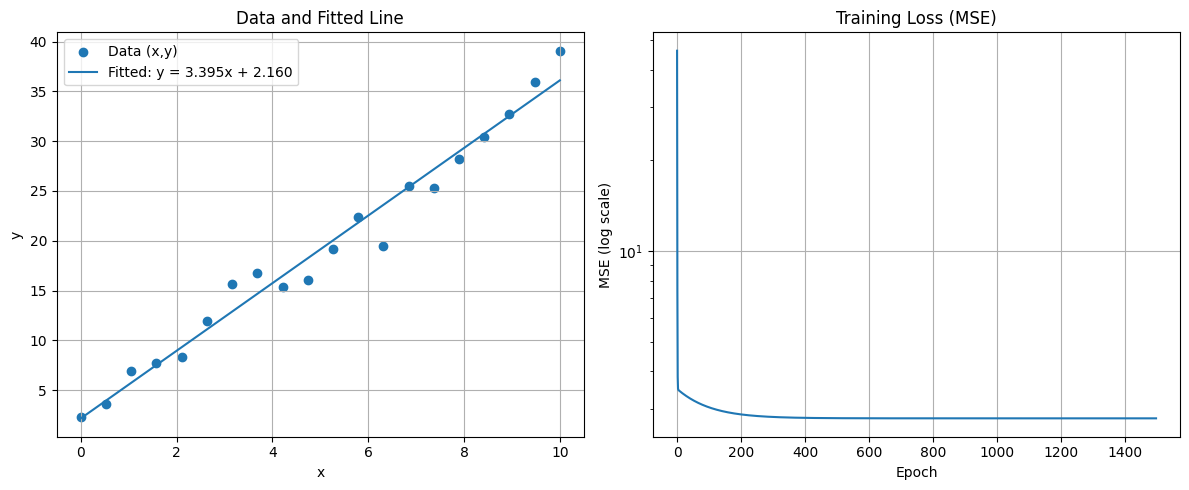

In [ ]:
"""
manual_linear_regression_gd.py
Simple linear regression (one variable) solved by gradient descent (manual)
No ML libraries used. Uses numpy for numerical convenience.
"""
def simple_linear_regression_gd(x, y,
                                learning_rate=0.001,
                                epochs=5000,
                                tol=1e-7,
                                verbose=True):
    """
    Fit y = m*x + c using batch gradient descent.
    Returns: (m, c, history) where history is dict with lists for 'm','c','mse'.
    """
    # initialize parameters (can be zero or small random)
    m = 0.0
    c = 0.0

    history = {'m': [], 'c': [], 'mse': []}
    prev_mse = float('inf')

    for epoch in range(1, epochs + 1):
        dm, dc = gradients(x, y, m, c)

        # Parameter update
        m = m - learning_rate * dm
        c = c - learning_rate * dc

        # compute current loss
        y_hat = m * x + c
        mse = compute_mse(y, y_hat)

        # record history
        history['m'].append(m)
        history['c'].append(c)
        history['mse'].append(mse)

        # verbose progress
        if verbose and (epoch % (epochs // 10 if epochs >= 10 else 1) == 0 or epoch == 1):
            print(f"Epoch {epoch:5d} | mse = {mse:.6f} | m = {m:.6f} | c = {c:.6f}")

        # stopping criterion
        if abs(prev_mse - mse) < tol:
            if verbose:
                print(f"Converged at epoch {epoch} with mse change < {tol}")
            break
        prev_mse = mse

    return m, c, history

def plot_fit_and_loss(x, y, m, c, history):
    """Plot data with fitted line and the MSE training curve"""
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.scatter(x, y, label='Data (x,y)')
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = m * x_line + c
    plt.plot(x_line, y_line, label=f'Fitted: y = {m:.3f}x + {c:.3f}')
    plt.xlabel('x'); plt.ylabel('y'); plt.title('Data and Fitted Line')
    plt.legend(); plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(history['mse'])
    plt.yscale('log')  # loss often decays quickly; log scale helps visibility
    plt.xlabel('Epoch')
    plt.ylabel('MSE (log scale)')
    plt.title('Training Loss (MSE)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # 1) Create a small sample dataset
    x, y = make_sample_data(n=20, seed=0, slope=3.5, intercept=2.0, noise_std=2.0)
    print("Sample dataset (first 8 rows):")
    for xi, yi in zip(x[:8], y[:8]):
        print(f"x={xi:.3f}, y={yi:.3f}")

    # 2) Fit using gradient descent
    # You may need to tune learning_rate and epochs depending on noise
    m, c, history = simple_linear_regression_gd(x, y,
                                               learning_rate=0.01,
                                               epochs=2000,
                                               tol=1e-9,
                                               verbose=True)

    # 3) Final results
    final_mse = history['mse'][-1]
    print("\nFinal model parameters:")
    print(f"  Slope (m)     = {m:.6f}")
    print(f"  Intercept (c) = {c:.6f}")
    print(f"  Final MSE     = {final_mse:.6f}")

    # 4) Plot fit and loss curve
    plot_fit_and_loss(x, y, m, c, history)
